In [969]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import math
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost.sklearn import XGBRegressor


from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [970]:
df = pd.read_csv(r"C:/Users/dimit/OneDrive/Desktop/git_projects/Coffee-review/df_scrapped.csv")

In [971]:
df.head(2)

,date,review_roaster,coffee,rating,link,Roaster Location:,Coffee Origin:,Roast Level:,Agtron:,Est. Price:,Review Date:,Aroma:,Body:,Flavor:,Aftertaste:,With Milk:,Acidity/Structure:,Acidity:
0,2024-01-04,Utopian Coffee,Cold Brew,93,https://www.coffeereview.com/review/cold-brew-8/,"Fort Wayne, Indiana",Not disclosed,Light,64/85,$18.00/12 ounces,January 2024,8.0,9,9,8,9.0,NaN,NaN
1,2024-01-04,JBC Coffee Roasters,Nkanda #7 Burundi,92,https://www.coffeereview.com/review/nkanda-7-b...,"Madison, Wisconsin","Tangara, Ngozi, Burundi",Medium-Light,58/78,$21.00/12 ounces,January 2024,8.0,9,9,8,NaN,8.0,NaN


In [972]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2532 non-null   object 
 1   review_roaster      2532 non-null   object 
 2   coffee              2532 non-null   object 
 3   rating              2532 non-null   int64  
 4   link                2532 non-null   object 
 5   Roaster Location:   2532 non-null   object 
 6   Coffee Origin:      2532 non-null   object 
 7   Roast Level:        2475 non-null   object 
 8   Agtron:             2532 non-null   object 
 9   Est. Price:         2526 non-null   object 
 10  Review Date:        2532 non-null   object 
 11  Aroma:              2520 non-null   float64
 12  Body:               2532 non-null   int64  
 13  Flavor:             2532 non-null   int64  
 14  Aftertaste:         2532 non-null   int64  
 15  With Milk:          330 non-null    float64
 16  Acidit

In [973]:
df.isnull().sum()

date                     0
review_roaster           0
coffee                   0
rating                   0
link                     0
Roaster Location:        0
Coffee Origin:           0
Roast Level:            57
Agtron:                  0
Est. Price:              6
Review Date:             0
Aroma:                  12
Body:                    0
Flavor:                  0
Aftertaste:              0
With Milk:            2202
Acidity/Structure:     322
Acidity:              2528
dtype: int64

In [974]:
df.describe()

,rating,Aroma:,Body:,Flavor:,Aftertaste:,With Milk:,Acidity/Structure:,Acidity:
count,2532.000000,2520.000000,2532.000000,2532.000000,2532.000000,330.000000,2210.000000,4.0
mean,93.056082,8.822619,8.614929,8.957741,8.099526,8.857576,8.517195,9.0
std,1.688977,0.432737,0.510481,0.363528,0.503217,0.506211,0.566871,0.0
min,80.000000,6.000000,6.000000,6.000000,5.000000,5.000000,6.000000,9.0
25%,92.000000,9.000000,8.000000,9.000000,8.000000,9.000000,8.000000,9.0
50%,93.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.0
75%,94.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.0
max,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.0


In [975]:
not_null=df['Acidity:'].notnull()

In [976]:
df[not_null]

,date,review_roaster,coffee,rating,link,Roaster Location:,Coffee Origin:,Roast Level:,Agtron:,Est. Price:,Review Date:,Aroma:,Body:,Flavor:,Aftertaste:,With Milk:,Acidity/Structure:,Acidity:
116,2024-01-04,Kakalove Cafe,Indonesia Sumatra Raja Harimau Lintong Mandhel...,95,https://www.coffeereview.com/review/indonesia-...,"Chia-Yi, Taiwan","Lintong growing region, North Sumatra, Indonesia",Medium-Light,58/77,NT $260/8 ounces,November 2023,9.0,9,9,9,NaN,NaN,9.0
886,2024-01-04,GK Coffee,Panama La Mula Geisha Washed,95,https://www.coffeereview.com/review/panama-la-...,"Yilan, Taiwan","Chiriqui Province, western Panama",Light,60/82,NT $1800/60 grams,July 2022,9.0,9,9,9,NaN,NaN,9.0
990,2024-01-04,Cozy House Coffee,British Style Espresso Blend,95,https://www.coffeereview.com/review/british-st...,"Taipei City, Taiwan",Panama; Honduras; Ethiopia,Medium,50/64,NT $500/227 grams,April 2022,9.0,9,9,9,NaN,NaN,9.0
1470,2024-01-04,JBC Coffee Roasters,La Perla Chiquita Ecuador,95,https://www.coffeereview.com/review/la-perla-c...,"Madison, Wisconsin","Pichincha Province, Ecuador",Medium-Light,56/76,$21.00/12 ounces,June 2021,9.0,9,9,9,NaN,NaN,9.0


In [977]:
df[df['Acidity:']==9.0]

,date,review_roaster,coffee,rating,link,Roaster Location:,Coffee Origin:,Roast Level:,Agtron:,Est. Price:,Review Date:,Aroma:,Body:,Flavor:,Aftertaste:,With Milk:,Acidity/Structure:,Acidity:
116,2024-01-04,Kakalove Cafe,Indonesia Sumatra Raja Harimau Lintong Mandhel...,95,https://www.coffeereview.com/review/indonesia-...,"Chia-Yi, Taiwan","Lintong growing region, North Sumatra, Indonesia",Medium-Light,58/77,NT $260/8 ounces,November 2023,9.0,9,9,9,NaN,NaN,9.0
886,2024-01-04,GK Coffee,Panama La Mula Geisha Washed,95,https://www.coffeereview.com/review/panama-la-...,"Yilan, Taiwan","Chiriqui Province, western Panama",Light,60/82,NT $1800/60 grams,July 2022,9.0,9,9,9,NaN,NaN,9.0
990,2024-01-04,Cozy House Coffee,British Style Espresso Blend,95,https://www.coffeereview.com/review/british-st...,"Taipei City, Taiwan",Panama; Honduras; Ethiopia,Medium,50/64,NT $500/227 grams,April 2022,9.0,9,9,9,NaN,NaN,9.0
1470,2024-01-04,JBC Coffee Roasters,La Perla Chiquita Ecuador,95,https://www.coffeereview.com/review/la-perla-c...,"Madison, Wisconsin","Pichincha Province, Ecuador",Medium-Light,56/76,$21.00/12 ounces,June 2021,9.0,9,9,9,NaN,NaN,9.0


In [978]:
df['Acidity/Structure:'].fillna(df['Acidity:'], inplace=True)

In [979]:
df

,date,review_roaster,coffee,rating,link,Roaster Location:,Coffee Origin:,Roast Level:,Agtron:,Est. Price:,Review Date:,Aroma:,Body:,Flavor:,Aftertaste:,With Milk:,Acidity/Structure:,Acidity:
0,2024-01-04,Utopian Coffee,Cold Brew,93,https://www.coffeereview.com/review/cold-brew-8/,"Fort Wayne, Indiana",Not disclosed,Light,64/85,$18.00/12 ounces,January 2024,8.0,9,9,8,9.0,NaN,NaN
1,2024-01-04,JBC Coffee Roasters,Nkanda #7 Burundi,92,https://www.coffeereview.com/review/nkanda-7-b...,"Madison, Wisconsin","Tangara, Ngozi, Burundi",Medium-Light,58/78,$21.00/12 ounces,January 2024,8.0,9,9,8,NaN,8.0,NaN
2,2024-01-04,Utopian Coffee,Pearl,91,https://www.coffeereview.com/review/pearl/,"Fort Wayne, Indiana",Not disclosed,Light,64/86,$18.00/12 ounces,January 2024,8.0,8,9,7,NaN,9.0,NaN
3,2024-01-04,Kafe Coffee Roastery,Peach-C Blend,94,https://www.coffeereview.com/review/peach-c-bl...,"Zhubei, Taiwan",Ethiopia; Colombia,Light,62/84,NT$ 366/8 ounces,January 2024,9.0,9,9,8,NaN,9.0,NaN
4,2024-01-04,Cafe Fugu Roasters,Kanazawa Light Roasted Espresso House Blend,92,https://www.coffeereview.com/review/kanazawa-l...,"Taipei City, Taiwan",Not disclosed,Light,65/86,NT$ 450/200 grams,January 2024,8.0,9,9,8,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,2024-01-04,Café Grumpy,Honduras Las Flores Parainema,94,https://www.coffeereview.com/review/honduras-l...,"Brooklyn, New York","Santa Bárbara, Honduras",Medium-Light,56/80,$22.00/12 ounces,January 2019,9.0,9,9,8,NaN,9.0,NaN
2528,2024-01-04,JBC Coffee Roasters,Kivu DR Congo,94,https://www.coffeereview.com/review/kivu-dr-co...,"Madison, Wisconsin","Kalehe, South Kivu Province, Democratic Republ...",Medium-Light,56/78,$16.90/12 ounces,January 2019,9.0,9,9,8,NaN,9.0,NaN
2529,2024-01-04,Coava Coffee Roasters,Santa Luzia Brazil,93,https://www.coffeereview.com/review/santa-luzi...,"Portland, Oregon","Cerrado Mineiro growing region, Santa Luzia, B...",Medium-Light,54/78,$15.00/250 grams,January 2019,9.0,9,9,8,NaN,8.0,NaN
2530,2024-01-04,Coava Coffee Roasters,Porfirio Castellanos Honduras,93,https://www.coffeereview.com/review/porfirio-c...,"Portland, Oregon","Santa Bárbara, Honduras",Medium-Light,56/80,$15.00/250 grams,January 2019,9.0,8,9,8,NaN,9.0,NaN


In [980]:
df.isnull().sum()

date                     0
review_roaster           0
coffee                   0
rating                   0
link                     0
Roaster Location:        0
Coffee Origin:           0
Roast Level:            57
Agtron:                  0
Est. Price:              6
Review Date:             0
Aroma:                  12
Body:                    0
Flavor:                  0
Aftertaste:              0
With Milk:            2202
Acidity/Structure:     318
Acidity:              2528
dtype: int64

In [981]:
df.drop('Acidity:', axis=1, inplace=True)

In [982]:
df[['Agtron1', 'Agtron2']] = df['Agtron:'].str.split('/', expand=True)

In [983]:
df['Agtron1'] = pd.to_numeric(df['Agtron1'], errors='coerce')

In [984]:
df['Agtron2'] = pd.to_numeric(df['Agtron2'], errors='coerce')

In [985]:
df['Agtron2'] = df['Agtron2'].fillna(0)

In [986]:
df['Agtron1'] = df['Agtron1'].fillna(0)

In [987]:
df['Unevent'] = abs(df['Agtron2'] - df['Agtron1'])

In [988]:
df['Unevent'] = df['Unevent'].fillna(0)

In [989]:
df

,date,review_roaster,coffee,rating,link,Roaster Location:,Coffee Origin:,Roast Level:,Agtron:,Est. Price:,Review Date:,Aroma:,Body:,Flavor:,Aftertaste:,With Milk:,Acidity/Structure:,Agtron1,Agtron2,Unevent
0,2024-01-04,Utopian Coffee,Cold Brew,93,https://www.coffeereview.com/review/cold-brew-8/,"Fort Wayne, Indiana",Not disclosed,Light,64/85,$18.00/12 ounces,January 2024,8.0,9,9,8,9.0,NaN,64.0,85.0,21.0
1,2024-01-04,JBC Coffee Roasters,Nkanda #7 Burundi,92,https://www.coffeereview.com/review/nkanda-7-b...,"Madison, Wisconsin","Tangara, Ngozi, Burundi",Medium-Light,58/78,$21.00/12 ounces,January 2024,8.0,9,9,8,NaN,8.0,58.0,78.0,20.0
2,2024-01-04,Utopian Coffee,Pearl,91,https://www.coffeereview.com/review/pearl/,"Fort Wayne, Indiana",Not disclosed,Light,64/86,$18.00/12 ounces,January 2024,8.0,8,9,7,NaN,9.0,64.0,86.0,22.0
3,2024-01-04,Kafe Coffee Roastery,Peach-C Blend,94,https://www.coffeereview.com/review/peach-c-bl...,"Zhubei, Taiwan",Ethiopia; Colombia,Light,62/84,NT$ 366/8 ounces,January 2024,9.0,9,9,8,NaN,9.0,62.0,84.0,22.0
4,2024-01-04,Cafe Fugu Roasters,Kanazawa Light Roasted Espresso House Blend,92,https://www.coffeereview.com/review/kanazawa-l...,"Taipei City, Taiwan",Not disclosed,Light,65/86,NT$ 450/200 grams,January 2024,8.0,9,9,8,8.0,NaN,65.0,86.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,2024-01-04,Café Grumpy,Honduras Las Flores Parainema,94,https://www.coffeereview.com/review/honduras-l...,"Brooklyn, New York","Santa Bárbara, Honduras",Medium-Light,56/80,$22.00/12 ounces,January 2019,9.0,9,9,8,NaN,9.0,56.0,80.0,24.0
2528,2024-01-04,JBC Coffee Roasters,Kivu DR Congo,94,https://www.coffeereview.com/review/kivu-dr-co...,"Madison, Wisconsin","Kalehe, South Kivu Province, Democratic Republ...",Medium-Light,56/78,$16.90/12 ounces,January 2019,9.0,9,9,8,NaN,9.0,56.0,78.0,22.0
2529,2024-01-04,Coava Coffee Roasters,Santa Luzia Brazil,93,https://www.coffeereview.com/review/santa-luzi...,"Portland, Oregon","Cerrado Mineiro growing region, Santa Luzia, B...",Medium-Light,54/78,$15.00/250 grams,January 2019,9.0,9,9,8,NaN,8.0,54.0,78.0,24.0
2530,2024-01-04,Coava Coffee Roasters,Porfirio Castellanos Honduras,93,https://www.coffeereview.com/review/porfirio-c...,"Portland, Oregon","Santa Bárbara, Honduras",Medium-Light,56/80,$15.00/250 grams,January 2019,9.0,8,9,8,NaN,9.0,56.0,80.0,24.0


In [990]:
df['Unevent'].unique()

array([2.100e+01, 2.000e+01, 2.200e+01, 1.500e+01, 1.900e+01, 1.800e+01,
       1.600e+01, 1.700e+01, 2.400e+01, 2.700e+01, 2.600e+01, 3.000e+01,
       3.200e+01, 6.410e+02, 2.800e+01, 0.000e+00, 2.900e+01, 8.000e+00,
       2.300e+01, 1.400e+01, 6.000e+00, 2.500e+01, 1.300e+01, 7.000e+00,
       1.200e+01, 4.000e+00, 1.100e+01, 3.000e+00, 9.000e+00, 3.500e+01,
       1.000e+01, 5.182e+03, 4.730e+02, 4.820e+02, 3.600e+01])

In [991]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2532 non-null   object 
 1   review_roaster      2532 non-null   object 
 2   coffee              2532 non-null   object 
 3   rating              2532 non-null   int64  
 4   link                2532 non-null   object 
 5   Roaster Location:   2532 non-null   object 
 6   Coffee Origin:      2532 non-null   object 
 7   Roast Level:        2475 non-null   object 
 8   Agtron:             2532 non-null   object 
 9   Est. Price:         2526 non-null   object 
 10  Review Date:        2532 non-null   object 
 11  Aroma:              2520 non-null   float64
 12  Body:               2532 non-null   int64  
 13  Flavor:             2532 non-null   int64  
 14  Aftertaste:         2532 non-null   int64  
 15  With Milk:          330 non-null    float64
 16  Acidit

In [992]:
df['Review Date:'] = pd.to_datetime(df['Review Date:'])

C:\Users\dimit\AppData\Local\Temp\ipykernel_14632\3076127145.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Review Date:'] = pd.to_datetime(df['Review Date:'])


In [993]:
df['date'] = pd.to_datetime(df['date'])

In [994]:
df['date_of_review'] = df['Review Date:'].dt.day
df['Month'] = df['Review Date:'].dt.month
df['Year'] = df['Review Date:'].dt.year

In [995]:
df['Est. Price:'] = df['Est. Price:'].str.split('/')

In [996]:
df['Est. Price:'] = df['Est. Price:'].fillna('0')

In [997]:
df['Est. Price:'][:2]

0    [$18.00, 12 ounces]
1    [$21.00, 12 ounces]
Name: Est. Price:, dtype: object

In [998]:
df['Est. Price:'][408]

'0'

In [999]:
df1 = pd.DataFrame(df['Est. Price:'].to_list(), columns=['price', 'unit','w','e'])
df1

,price,unit,w,e
0,$18.00,12 ounces,None,None
1,$21.00,12 ounces,None,None
2,$18.00,12 ounces,None,None
3,NT$ 366,8 ounces,None,None
4,NT$ 450,200 grams,None,None
...,...,...,...,...
2527,$22.00,12 ounces,None,None
2528,$16.90,12 ounces,None,None
2529,$15.00,250 grams,None,None
2530,$15.00,250 grams,None,None


In [1000]:
df = pd.concat([df1, df], axis=1)
df.drop(['w','e'], axis=1, inplace=True)


In [1001]:
df['unit'] = df['unit'].fillna('0')

In [1002]:
import re
df['price'] = df['price'].str.extract(r'(\d+\.\d+|\d+)')

In [1003]:
df['unit'] = df['unit'].str.split(' ')

In [1004]:
df2 = pd.DataFrame(df['unit'].to_list())
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,12,ounces,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,12,ounces,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,12,ounces,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,8,ounces,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,200,grams,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,12,ounces,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2528,12,ounces,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2529,250,grams,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2530,250,grams,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [1005]:
df2[df2[2].notnull()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
330,boxed,set,(125,grams,of,this,coffee,plus,125,grams,of,an,anaerobic-processed,coffee,from,the,same,farm)
433,5,single-serve,brew,bags,None,None,None,None,None,None,None,None,None,None,None,None,None,None
434,10,single-serve,brew,bags,None,None,None,None,None,None,None,None,None,None,None,None,None,None
435,8,single-serve,brew,bags,None,None,None,None,None,None,None,None,None,None,None,None,None,None
436,5,single-serve,brew,bags,None,None,None,None,None,None,None,None,None,None,None,None,None,None
437,10,single-serve,brew,bags,None,None,None,None,None,None,None,None,None,None,None,None,None,None
438,1,single-serve,brew,bag,None,None,None,None,None,None,None,None,None,None,None,None,None,None
439,5,single-serve,brew,bags,None,None,None,None,None,None,None,None,None,None,None,None,None,None
440,10,single-serve,brew,bags,None,None,None,None,None,None,None,None,None,None,None,None,None,None
441,8,single-serve,brew,bags,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [1006]:
df = pd.concat([df2, df], axis=1)
df.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], axis=1, inplace=True)
df


,0,1,price,unit,date,review_roaster,coffee,rating,link,Roaster Location:,...,Flavor:,Aftertaste:,With Milk:,Acidity/Structure:,Agtron1,Agtron2,Unevent,date_of_review,Month,Year
0,12,ounces,18.00,"[12, ounces]",2024-01-04,Utopian Coffee,Cold Brew,93,https://www.coffeereview.com/review/cold-brew-8/,"Fort Wayne, Indiana",...,9,8,9.0,NaN,64.0,85.0,21.0,1,1,2024
1,12,ounces,21.00,"[12, ounces]",2024-01-04,JBC Coffee Roasters,Nkanda #7 Burundi,92,https://www.coffeereview.com/review/nkanda-7-b...,"Madison, Wisconsin",...,9,8,NaN,8.0,58.0,78.0,20.0,1,1,2024
2,12,ounces,18.00,"[12, ounces]",2024-01-04,Utopian Coffee,Pearl,91,https://www.coffeereview.com/review/pearl/,"Fort Wayne, Indiana",...,9,7,NaN,9.0,64.0,86.0,22.0,1,1,2024
3,8,ounces,366,"[8, ounces]",2024-01-04,Kafe Coffee Roastery,Peach-C Blend,94,https://www.coffeereview.com/review/peach-c-bl...,"Zhubei, Taiwan",...,9,8,NaN,9.0,62.0,84.0,22.0,1,1,2024
4,200,grams,450,"[200, grams]",2024-01-04,Cafe Fugu Roasters,Kanazawa Light Roasted Espresso House Blend,92,https://www.coffeereview.com/review/kanazawa-l...,"Taipei City, Taiwan",...,9,8,8.0,NaN,65.0,86.0,21.0,1,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,12,ounces,22.00,"[12, ounces]",2024-01-04,Café Grumpy,Honduras Las Flores Parainema,94,https://www.coffeereview.com/review/honduras-l...,"Brooklyn, New York",...,9,8,NaN,9.0,56.0,80.0,24.0,1,1,2019
2528,12,ounces,16.90,"[12, ounces]",2024-01-04,JBC Coffee Roasters,Kivu DR Congo,94,https://www.coffeereview.com/review/kivu-dr-co...,"Madison, Wisconsin",...,9,8,NaN,9.0,56.0,78.0,22.0,1,1,2019
2529,250,grams,15.00,"[250, grams]",2024-01-04,Coava Coffee Roasters,Santa Luzia Brazil,93,https://www.coffeereview.com/review/santa-luzi...,"Portland, Oregon",...,9,8,NaN,8.0,54.0,78.0,24.0,1,1,2019
2530,250,grams,15.00,"[250, grams]",2024-01-04,Coava Coffee Roasters,Porfirio Castellanos Honduras,93,https://www.coffeereview.com/review/porfirio-c...,"Portland, Oregon",...,9,8,NaN,9.0,56.0,80.0,24.0,1,1,2019


In [1007]:
df = df.rename(columns={0: 'measure',1:'unit_of_measure'})

In [1008]:
df.head(2)

,measure,unit_of_measure,price,unit,date,review_roaster,coffee,rating,link,Roaster Location:,...,Flavor:,Aftertaste:,With Milk:,Acidity/Structure:,Agtron1,Agtron2,Unevent,date_of_review,Month,Year
0,12,ounces,18.00,"[12, ounces]",2024-01-04,Utopian Coffee,Cold Brew,93,https://www.coffeereview.com/review/cold-brew-8/,"Fort Wayne, Indiana",...,9,8,9.0,NaN,64.0,85.0,21.0,1,1,2024
1,12,ounces,21.00,"[12, ounces]",2024-01-04,JBC Coffee Roasters,Nkanda #7 Burundi,92,https://www.coffeereview.com/review/nkanda-7-b...,"Madison, Wisconsin",...,9,8,NaN,8.0,58.0,78.0,20.0,1,1,2024


In [1009]:
df['price'] = df['price'].astype(float)

In [1010]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   measure             2532 non-null   object        
 1   unit_of_measure     2516 non-null   object        
 2   price               2529 non-null   float64       
 3   unit                2532 non-null   object        
 4   date                2532 non-null   datetime64[ns]
 5   review_roaster      2532 non-null   object        
 6   coffee              2532 non-null   object        
 7   rating              2532 non-null   int64         
 8   link                2532 non-null   object        
 9   Roaster Location:   2532 non-null   object        
 10  Coffee Origin:      2532 non-null   object        
 11  Roast Level:        2475 non-null   object        
 12  Agtron:             2532 non-null   object        
 13  Est. Price:         2532 non-null   object      

In [1011]:
df['measure'].unique()

array(['12', '8', '200', '250', '227', '4', '225', '100', '20', '10', '6',
       '230', '16', '12-ounce', '24', '454', '0', 'boxed', '240', '300',
       '5', '1', '455', '310', '285', '150', '175', '', '225g', '200g',
       '230g', '50', '14', '60', '350', '5.5', '113', '105', '220', '115',
       '7', '275', '227g', '10.5', '400', '120', '150-gram', '70', '453',
       '12.64', '160-ml', '200-ml', 'six', '280', 'four', 'twelve', '375',
       '11', 'seven', '500', '460', '30', '450', '2', '222', '8-ounce',
       'can', 'Four', '10.5-ounce', '4-12-ounce', 'sachet', '340', '22',
       '32', '18', '21', '3', 'five'], dtype=object)

In [1012]:
values_to_drop = ['can', 'Four', '10.5-ounce', '4-12-ounce', 'sachet', 'five', 'boxed', 'six', 'four', 'twelve', 'seven', '160-ml', '200-ml', '0', np.nan]

# Use applymap to replace the specified values with NaN
df = df.applymap(lambda x: None if x in values_to_drop else x)

# Drop columns with all values in values_to_drop
df = df.dropna(axis=1, how='all')

In [1013]:
df['measure']=df['measure'].replace('12-ounce', '12')
df['unit_of_measure']=df['unit_of_measure'].replace(['can','bottle','bottle;'], 'ounces')

df['measure']=df['measure'].replace('225g', '225')
df['unit_of_measure']=df['unit_of_measure'].replace('None', 'grams')

df['measure']=df['measure'].replace('200g', '200')
df['unit_of_measure']=df['unit_of_measure'].replace('None', 'grams')

df['measure']=df['measure'].replace('230g', '230')
df['unit_of_measure']=df['unit_of_measure'].replace('None', 'grams')

df['measure']=df['measure'].replace('227g', '227')
df['unit_of_measure']=df['unit_of_measure'].replace('None', 'grams')

df['measure']=df['measure'].replace('150-gram', '150')
df['unit_of_measure']=df['unit_of_measure'].replace(['packet', 'tin'], 'grams')


df['measure']=df['measure'].replace('8-ounce', '8')
df['unit_of_measure']=df['unit_of_measure'].replace('can', 'ounces')

df['measure'] = np.where(df['measure'] == '', df['unit_of_measure'], df['measure'])
df['unit_of_measure']=df['unit_of_measure'].replace(['8', '7', '12'], 'ounces')
df['unit_of_measure']=df['unit_of_measure'].replace('227', 'grams')
df['unit_of_measure']=df['unit_of_measure'].replace('18-gram', 'grams')
df['unit_of_measure']=df['unit_of_measure'].replace('grams;', 'grams')
df['unit_of_measure']=df['unit_of_measure'].replace('ml.', 'ml')
df['unit_of_measure']=df['unit_of_measure'].replace('9.5-ounce', 'ounces')
df['unit_of_measure']=df['unit_of_measure'].replace('ounces;', 'ounces')
df['unit_of_measure']=df['unit_of_measure'].replace('ounces*', 'ounces')

df = df.dropna(subset=['measure'])
df = df.dropna(subset=['unit_of_measure'])


In [1014]:
df['unit_of_measure'].unique()

array(['ounces', 'grams', 'single-serve', 'capsules', 'ml', 'kilo',
       'sticks', 'pounds'], dtype=object)

In [1015]:
n_df=df.select_dtypes(include=np.number)

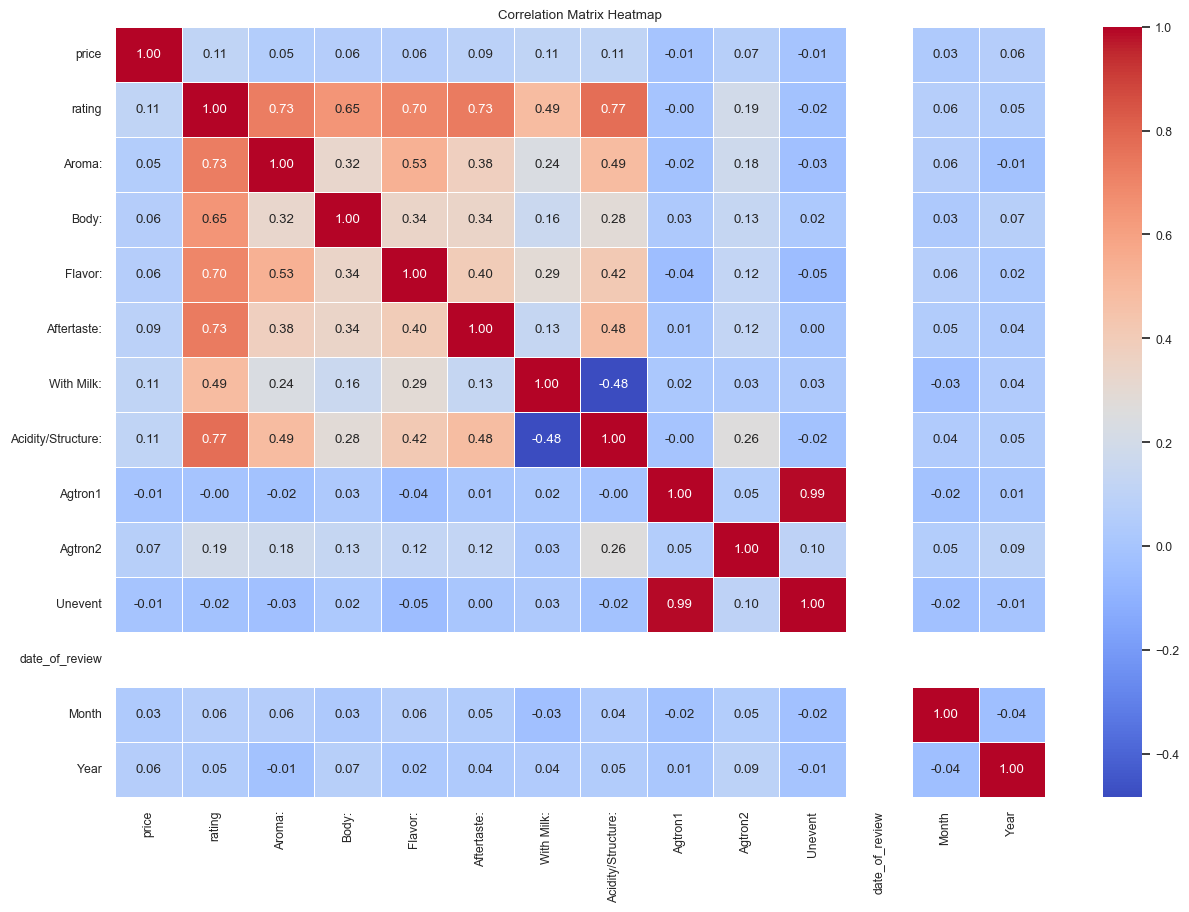

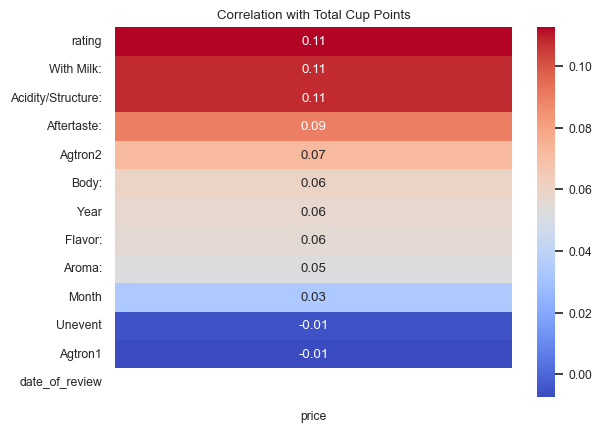

In [1016]:
correlation_matrix = n_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = n_df.corr()
target_corr = corr['price'].drop('price')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Total Cup Points')
plt.show()

In [1017]:
df['Roast Level:']

0              Light
1       Medium-Light
2              Light
3              Light
4              Light
            ...     
2527    Medium-Light
2528    Medium-Light
2529    Medium-Light
2530    Medium-Light
2531    Medium-Light
Name: Roast Level:, Length: 2500, dtype: object

In [1018]:
df=df.drop('With Milk:', axis=1)

In [1019]:
df=df.dropna()

In [1020]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2162 entries, 1 to 2531
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   measure             2162 non-null   object        
 1   unit_of_measure     2162 non-null   object        
 2   price               2162 non-null   float64       
 3   unit                2162 non-null   object        
 4   date                2162 non-null   datetime64[ns]
 5   review_roaster      2162 non-null   object        
 6   coffee              2162 non-null   object        
 7   rating              2162 non-null   int64         
 8   link                2162 non-null   object        
 9   Roaster Location:   2162 non-null   object        
 10  Coffee Origin:      2162 non-null   object        
 11  Roast Level:        2162 non-null   object        
 12  Agtron:             2162 non-null   object        
 13  Est. Price:         2162 non-null   object        
 1

In [1021]:
df = pd.get_dummies(df, columns=['Roast Level:'],dtype=int)

In [1022]:
df.measure=pd.to_numeric(df.measure, errors='coerce')

In [1023]:
df = df[df['unit_of_measure'] != 'grams']

In [1024]:
features=['price', 'Aroma:', 'Body:', 'Flavor:',
       'Aftertaste:', 'Acidity/Structure:', 'Unevent', 'Month', 'Year', 'Roast Level:_Dark',
       'Roast Level:_Light', 'Roast Level:_Medium', 'Roast Level:_Medium-Dark',
       'Roast Level:_Medium-Light']

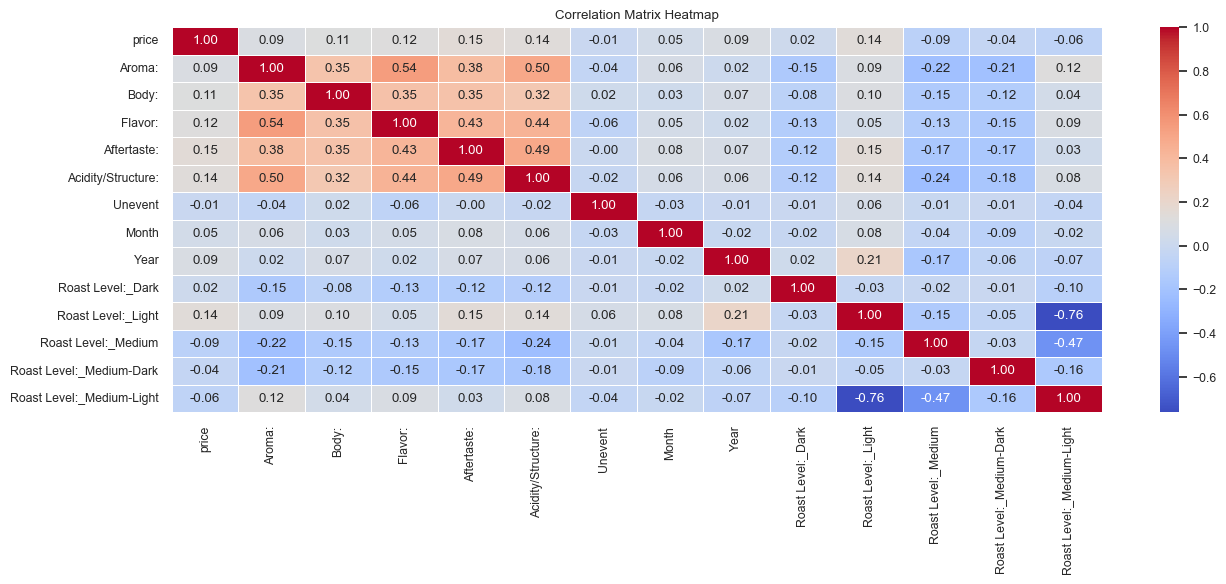

In [1025]:
correlation_matrix = df[features].corr()
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [1026]:
X = df[features]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [1027]:
X_train.shape

(1413, 14)

In [1028]:
X_test.shape

(354, 14)

In [1029]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean error',  math.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score: ',r2_score(y_test, y_pred)*100)

Mean Squared Error: 0.011619960711345273
Mean error 0.10779592158957255
R2 score:  99.56637563271732


In [1030]:
cross_val_score(model, X, y, cv = 10)

array([0.99507021, 0.99377127, 0.98821704, 0.99095149, 0.99763608,
       0.99995264, 0.92756699, 0.99839294, 0.99521712, 0.99996465])

In [1032]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean error',  math.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score: ',r2_score(y_test, y_pred)*100)

Mean Squared Error: 0.016032768970774672
Mean error 0.12662057088314943
R2 score:  99.40170199594965
